## Find Additional features to predict Acid Reflux

This notebook is being written to analyze following features if they can be used as input to machine learning models -

1. Smoking Status

2. Conditions

3. Allergies

4. Transcript details

5. Lab Results

6. Other Diagnosis

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')
sns.set_context("notebook", font_scale=1)
sns.set_style("darkgrid")


import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import date

%matplotlib inline

#### Analyze Smoking Status

In [2]:
smoking_status = pd.read_csv("./data/SmokingStatus.csv")
smoking_status

,SmokingStatusGuid,Description,NISTcode
0,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460,Current status unknown,9
1,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,Not a current tobacco user,0
2,C12C2DB7-D31A-4514-88C0-42CBD339F764,0 cigarettes per day (previous smoker),3
3,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,Few (1-3) cigarettes per day,2
4,0815F240-3DD3-43C6-8618-613CA9E41F9F,Current status unknown,5
5,02116D5A-F26C-4A48-9A11-75AC21BC4FD3,2 or more packs per day,1
6,DD01E545-D7AF-4F00-B248-9FD40010D81D,Up to 1 pack per day,1
7,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,1-2 packs per day,1
8,5ABBAB35-836F-4F3E-8632-CE063828DA15,0 cigarettes per day (non-smoker or less than ...,4
9,2548BD83-03AE-4287-A578-FA170F39E32F,Current Tobacco user,0


In [3]:
### Reduce text size for description such that it's easy to use as feature
smoking_status.Description = smoking_status.Description.str.replace(" ", "").str[:30]

In [4]:
### Load Patient Smoking Status
smoking_patients = pd.read_csv("./data/PatientSmokingStatus.csv")
smoking_patients.shape

(2443, 4)

In [5]:
smoking_patients.head(2)

,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear
0,09277F4C-08D3-408C-A5CC-00445D8A36C9,6A48A770-4418-4AA4-9CBA-41CA67393A4B,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012
1,81318CE5-10C6-45A5-992C-0045B147740B,879E784D-2509-4B34-B74C-E53D69259F37,DD01E545-D7AF-4F00-B248-9FD40010D81D,2011


##### Merge Patient Smoking Status and Smoking Status to get exact patient smoking status

In [6]:
smoking_patients = pd.merge(smoking_patients,smoking_status,how='left',on=["SmokingStatusGuid"])

In [7]:
smoking_patients.PatientGuid.describe()

count                                     2443
unique                                    2195
top       0F463529-F2B5-4AAC-80ED-AA2C3DD5E3C5
freq                                         6
Name: PatientGuid, dtype: object

___Note: there are duplicate patient smoking status. In that case, pick up the latest patient smoking status.___

In [8]:
smoking_patients.sort_values(by=["PatientGuid","EffectiveYear"],ascending=False,inplace=True)
smoking_patients.drop_duplicates(subset=["PatientGuid"],keep='first',inplace=True)
smoking_patients.PatientGuid.describe()

count                                     2195
unique                                    2195
top       BC28BF46-B72C-45BD-A1F7-2211CBBAE009
freq                                         1
Name: PatientGuid, dtype: object

In [9]:
smoking_patients.head(2)

,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear,Description,NISTcode
1478,8BE67CD4-667D-49B7-8A9C-9B53FB0C5A28,FFD99EE9-B289-4A27-9FF6-328ABFE8047E,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012,0cigarettesperday(non-smokeror,4
874,A5B6C1CE-BB55-4D4A-8CFF-583CC106BE15,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,DD01E545-D7AF-4F00-B248-9FD40010D81D,2011,Upto1packperday,1


In [10]:
#Drop columns that's 
smoking_patients.drop(["PatientSmokingStatusGuid","SmokingStatusGuid","EffectiveYear","NISTcode"],axis=1,inplace=True)
smoking_patients.head(2)

,PatientGuid,Description
1478,FFD99EE9-B289-4A27-9FF6-328ABFE8047E,0cigarettesperday(non-smokeror
874,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,Upto1packperday


#### Convert smoking status as feature by one hot encoding

In [11]:
one_hot_smoking_status = pd.get_dummies(smoking_patients.Description)
one_hot_smoking_status.shape

(2195, 9)

In [12]:
one_hot_smoking_status.head(2)

,0cigarettesperday(non-smokeror,0cigarettesperday(previoussmok,1-2packsperday,2ormorepacksperday,CurrentTobaccouser,Currentstatusunknown,Few(1-3)cigarettesperday,Notacurrenttobaccouser,Upto1packperday
1478,1,0,0,0,0,0,0,0,0
874,0,0,0,0,0,0,0,0,1


In [13]:
smoking_features = smoking_patients.join(one_hot_smoking_status)
smoking_features.drop(["Description"],axis=1,inplace=True)
smoking_features.head(2)

,PatientGuid,0cigarettesperday(non-smokeror,0cigarettesperday(previoussmok,1-2packsperday,2ormorepacksperday,CurrentTobaccouser,Currentstatusunknown,Few(1-3)cigarettesperday,Notacurrenttobaccouser,Upto1packperday
1478,FFD99EE9-B289-4A27-9FF6-328ABFE8047E,1,0,0,0,0,0,0,0,0
874,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,0,0,0,0,0,0,0,0,1


In [14]:
### Save Smoking feature into a CSV file
smoking_features.to_csv("./features/smoking_features.csv",index=False)

## Let's look at the Condition

In [15]:
conditions = pd.read_csv("./data/Condition.csv")
conditions

,ConditionGuid,Code,Name
0,D4FF24EA-658D-4500-A71F-821F9776FB27,NOKNOWNDIAGNOSES,No Known Diagnoses
1,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,NOKNOWNALLERGIES,No Known Allergies
2,2AE517F6-5029-4BC4-9353-FB8E0CC3A822,NOKNOWNMEDICATIONS,No Known Medications


In [16]:
patients_conditions = pd.read_csv("./data/PatientCondition.csv")
patients_conditions.PatientGuid.describe()

count                                     1432
unique                                    1424
top       21CB7772-1921-4CC6-8303-68DA94E149D5
freq                                         2
Name: PatientGuid, dtype: object

___Looks like there are a few duplicate patients. Let's pick latest patient status in that case.___

In [17]:
patients_conditions.sort_values(by=["PatientGuid","CreatedYear"],ascending=False,inplace=True)
patients_conditions.drop_duplicates(subset=["PatientGuid"],keep='first',inplace=True)
patients_conditions.PatientGuid.describe()

count                                     1424
unique                                    1424
top       FECFB976-999A-4839-924E-CED811FA5703
freq                                         1
Name: PatientGuid, dtype: object

In [18]:
patients_conditions.head(2)

,PatientConditionGuid,PatientGuid,ConditionGuid,CreatedYear
740,1CFD490A-2E55-4E46-83FE-81E77BD7CC7C,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
688,74CBFB59-A056-4F94-BEA9-794870FDFFD4,FFAE32A5-2F9F-406A-BCDE-B0B25B0D84C6,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2012


In [19]:
### Merge Patients conditions with condition list

patients_conditions = pd.merge(patients_conditions, conditions, how='left',on=["ConditionGuid"])
patients_conditions.head(2)

,PatientConditionGuid,PatientGuid,ConditionGuid,CreatedYear,Code,Name
0,1CFD490A-2E55-4E46-83FE-81E77BD7CC7C,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011,NOKNOWNALLERGIES,No Known Allergies
1,74CBFB59-A056-4F94-BEA9-794870FDFFD4,FFAE32A5-2F9F-406A-BCDE-B0B25B0D84C6,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2012,NOKNOWNALLERGIES,No Known Allergies


In [20]:
#### Drop columns that are not needed
patients_conditions.drop(["PatientConditionGuid","ConditionGuid","CreatedYear","Name"],axis=1,inplace=True)
patients_conditions.head(2)

,PatientGuid,Code
0,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,NOKNOWNALLERGIES
1,FFAE32A5-2F9F-406A-BCDE-B0B25B0D84C6,NOKNOWNALLERGIES


#### Convert patient conditions into feature by by one hot encoding the code

In [21]:
one_hot_condition_code = pd.get_dummies(patients_conditions.Code)
patients_conditions_feature = patients_conditions.join(one_hot_condition_code)
patients_conditions_feature.drop(["Code"],axis=1,inplace=True)
patients_conditions_feature.head(2)

,PatientGuid,NOKNOWNALLERGIES,NOKNOWNMEDICATIONS
0,FFD755A4-3DA7-43B8-8477-99BFBCED4A10,1,0
1,FFAE32A5-2F9F-406A-BCDE-B0B25B0D84C6,1,0


In [22]:
### Save Patients conditions to CSV
patients_conditions_feature.to_csv("./features/patients_conditions_feature.csv",index=False)

## Let's look at Transcript

In [23]:
patients_transcript = pd.read_csv("./data/Transcript.csv")
patients_transcript.shape

(65259, 13)

In [24]:
patients_transcript.head(2)

,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,ACFC59D1-CB56-4E82-9906-0001962BC912,50BABFE9-D522-425D-86A0-170300961A46,2010,NaN,280.6,NaN,142,88,NaN,NaN,NaN,Endocrinology; Diabetes; & Metabolism,F8CD9BD7-C9AF-4F9E-A04D-94BA1191317E
1,7F58392C-FB76-401C-85E6-00036DEDA220,C8353F84-C384-4762-8560-836B50F9198A,2010,63.0,120.0,21.255,120,80,18.0,NaN,95.2,Internal Medicine,2F7B6534-886A-4CC7-958E-2197A1741126


In [25]:
patients_transcript.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TranscriptGuid,65259,65259,B0FF7E69-8AC6-497E-9DB3-C90BE7E22533,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PatientGuid,65259,4979,2A1C0131-F227-4AAC-8745-59B213A0DCEA,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VisitYear,65259,NaN,NaN,NaN,1948.78,346.604,0,2010,2010,2011,2012
Height,29729,NaN,NaN,NaN,65.5936,4.87983,0.394,62.9,65.5,69,120
Weight,65259,NaN,NaN,NaN,102.612,96.4028,0,0,130,182,1311
BMI,29373,NaN,NaN,NaN,35.3043,310.122,0.072,24.744,28.475,33.062,48056.6
SystolicBP,65259,NaN,NaN,NaN,82.8431,61.9934,0,0,114,130,458
DiastolicBP,65259,NaN,NaN,NaN,50.0618,37.5859,0,0,70,80,150
RespiratoryRate,25537,NaN,NaN,NaN,16.8979,3.05151,1,16,16,18,80
HeartRate,5,NaN,NaN,NaN,10.8,7.94984,5,5,5,19,20


___Based upon the data above, it may make sense to include following features: - ___

-  Weight
-  BMI
-  SystolicBP
-  DiastolicBP
-  RespiratoryRate

__Also looking above, we don't have BMI and RespiratoryRate entry for every transcript. We will use the mean value (may not be the best option, but seems reasonable looking at the data) for the patients across multiple visits.__


In [26]:
patients_transcript = patients_transcript[["PatientGuid","Weight","BMI","SystolicBP","DiastolicBP","RespiratoryRate"]]
patients_transcript.head(2)

,PatientGuid,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,50BABFE9-D522-425D-86A0-170300961A46,280.6,NaN,142,88,NaN
1,C8353F84-C384-4762-8560-836B50F9198A,120.0,21.255,120,80,18.0


#### Since there are multiple entries for each patient, we will take mean of each patient.

In [27]:
patients_transcript = patients_transcript.groupby(["PatientGuid"]).mean().reset_index()
patients_transcript.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientGuid,4979,4979,83ACEEEB-72C3-4C9B-80C2-D03CC8BC5396,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,4979,NaN,NaN,NaN,120.266,61.5633,0.636364,72.1167,120.636,163.092,399.75
BMI,4979,NaN,NaN,NaN,36.5806,188.593,10.245,24.7034,28.244,32.6014,12034.9
SystolicBP,4979,NaN,NaN,NaN,93.6878,34.8883,1.90476,69.6077,99.6667,121.485,200.333
DiastolicBP,4979,NaN,NaN,NaN,56.9804,21.2098,1.20635,42.1833,60.5,74,110.4
RespiratoryRate,3540,NaN,NaN,NaN,16.6774,2.67216,8,15.5,16.6667,18,57.5


___Looks like RespiratoryRate still doesn't have all values populated. Let's populate that with median value.___

In [28]:
patients_transcript.RespiratoryRate = patients_transcript.RespiratoryRate.fillna(np.mean(patients_transcript.RespiratoryRate))
patients_transcript.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientGuid,4979,4979,83ACEEEB-72C3-4C9B-80C2-D03CC8BC5396,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,4979,NaN,NaN,NaN,120.266,61.5633,0.636364,72.1167,120.636,163.092,399.75
BMI,4979,NaN,NaN,NaN,36.5806,188.593,10.245,24.7034,28.244,32.6014,12034.9
SystolicBP,4979,NaN,NaN,NaN,93.6878,34.8883,1.90476,69.6077,99.6667,121.485,200.333
DiastolicBP,4979,NaN,NaN,NaN,56.9804,21.2098,1.20635,42.1833,60.5,74,110.4
RespiratoryRate,4979,NaN,NaN,NaN,16.6774,2.25307,8,16,16.6774,17.6667,57.5


___Looking at above description, there are some outliers in the data. But for this cycle, we will leave outliers as is and will get to them later.___

__Save the features to CSV file -__

In [29]:
patients_transcript.to_csv("./features/patients_transcript_features.csv",index=False)
patients_transcript.head(2)

,PatientGuid,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,00033D2D-D57C-48A7-B201-F9183F6E640B,190.800,30.771000,141.3,72.500,15.888889
1,00044CC1-7911-4C35-B73C-B5623FA3A60F,56.375,26.209667,52.0,33.625,16.000000


#### Let's look at Lab Results

In [30]:
lab_results = pd.read_csv("./data/LabResult.csv")
lab_results.head(2)

,LabResultGuid,UserGuid,PatientGuid,TranscriptGuid,PracticeGuid,FacilityGuid,ReportYear,AncestorLabResultGuid
0,8CEDECBA-4205-4160-A1ED-0027B5A5A48E,3027FCA9-C076-4B4D-823E-840FE03E1AFE,22022157-D43A-43B3-B1D0-D87529DD82E7,00000000-0000-0000-0000-000000000000,A2F40C7C-E6C8-4E0E-9B80-478D39494222,7237AD6A-C72C-48A9-B60B-1BB5FC90EEBD,2011,0FF11C47-6ECC-4337-8F30-1747A3EDB11D
1,18A431CD-B905-4904-B447-0060FE68FFE8,C5CF633F-692E-4132-8CD8-0B47BD8B0320,0700F3D4-50A3-427B-AC2C-06BC7F297B55,00000000-0000-0000-0000-000000000000,2BF2C174-46C6-4B50-A228-81C11E963397,F2F89F86-BE1F-43E7-B07A-14931F4398EB,2011,00000000-0000-0000-0000-000000000000


In [31]:
lab_results.shape

(1078, 8)

In [32]:
#### Drop the fields that may not be needed
lab_results = lab_results[["LabResultGuid","PatientGuid"]]

In [33]:
lab_panel = pd.read_csv("./data/LabPanel.csv")
lab_panel.head(2)

,PanelName,LabPanelGuid,LabResultGuid,ObservationYear,Status
0,083824+CBC/D/Plt+RPR+Rh+ABO...,F2A90FC9-C4C2-4DDD-9131-93FC013F5369,92D1032B-3ED4-4226-8FBD-B17C8AA70764,2012,Final
1,083824+CBC/D/Plt+RPR+Rh+ABO...,49CC56ED-6903-44EB-8C20-FAE800D729B2,262EC4C2-4272-453C-8321-4E9ED0887F2C,2011,Final


In [34]:
lab_panel.shape

(5411, 5)

In [35]:
### Drop the fields that are not needed
lab_panel = lab_panel[["LabPanelGuid","LabResultGuid"]]

In [36]:
### join lab_results with lab_panel
lab_results = pd.merge(lab_results,lab_panel,how='left',on=["LabResultGuid"])
lab_results.shape

(3658, 3)

In [37]:
lab_results.head(2)

,LabResultGuid,PatientGuid,LabPanelGuid
0,8CEDECBA-4205-4160-A1ED-0027B5A5A48E,22022157-D43A-43B3-B1D0-D87529DD82E7,EE2160F8-90E9-4891-A883-B284B39841C7
1,8CEDECBA-4205-4160-A1ED-0027B5A5A48E,22022157-D43A-43B3-B1D0-D87529DD82E7,17BBBEF1-BAA5-4DA3-BF70-0AD74ED0F71C


##### Now let's look at Lab Observations

In [38]:
lab_ovservations = pd.read_csv("./data/LabObservation.csv")
lab_ovservations.head(2)

,HL7Identifier,HL7Text,LabObservationGuid,LabPanelGuid,HL7CodingSystem,ObservationValue,Units,ReferenceRange,AbnormalFlags,ResultStatus,ObservationYear,UserGuid,IsAbnormalValue
0,001016,"Calcium, Serum",BF7D56C4-3CEA-4F8A-A63F-7BB92ED0BFEB,72899B5C-50DB-4E24-974E-DC3775B1D205,LabCorpLocal,9.1,mg/dL,8.6-10.2,NaN,Final,2011,00000000-0000-0000-0000-000000000000,0
1,001016,"Calcium, Serum",84336295-0551-49B5-A069-55717CD236C8,0CB31DA0-7533-4FBB-BF3A-692931F85DAE,LabCorpLocal,9.0,mg/dL,8.7-10.2,NaN,Final,2011,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC,0


In [39]:
X = lab_ovservations[["HL7Identifier","HL7Text"]].drop_duplicates()
X[X.HL7Identifier != X.HL7Identifier].head(5)

,HL7Identifier,HL7Text
2762,NaN,eGFR
2824,NaN,eGFR AfricanAmerican
2886,NaN,RDW
3570,NaN,INR
3572,NaN,Immature Cells


In [40]:
X[X.HL7Text != X.HL7Text].head(5)

,HL7Identifier,HL7Text


__Since HL7Identifier has a lot of null value, but HL7text has value quite nicely populated. we will use HL7text.__

Also will keep it simple for this cycle. Will just pick HL7text and measurement for it. Will ignore the rest of the fields for this particular cycle (may not be the best decision. But given the time constratint, it may work out ok.)

In [41]:
lab_ovservations.ObservationValue.describe()

count    12028.000000
mean        44.247631
std         94.683759
min          0.000000
25%          2.000000
50%          6.900000
75%         42.000000
max       1813.400000
Name: ObservationValue, dtype: float64

In [42]:
lab_ovservations = lab_ovservations[["HL7Text","LabPanelGuid","ObservationValue"]]

In [43]:
### Now merge lab_results with lab_observations

lab_results = pd.merge(lab_results,lab_ovservations,how='left',on=["LabPanelGuid"])
lab_results = lab_results[["PatientGuid","HL7Text","ObservationValue"]]
lab_results.head(2)

,PatientGuid,HL7Text,ObservationValue
0,22022157-D43A-43B3-B1D0-D87529DD82E7,Hematocrit,40.5
1,22022157-D43A-43B3-B1D0-D87529DD82E7,Hemoglobin,13.6


#### Convert this into feature for machine learning model

In [44]:
lab_results.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientGuid,11834,446,22022157-D43A-43B3-B1D0-D87529DD82E7,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HL7Text,10488,299,Protein,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ObservationValue,8580,NaN,NaN,NaN,42.3244,86.6603,0,2,6.8,41.2,1580


___As can be seen above, there are multiple labs for each patients. If there are multiple lab results for same HL7Text, then we will take mean value of the reading.___

In [45]:
patient_lab_results_features = pd.pivot_table(lab_results,index="PatientGuid",columns="HL7Text",values="ObservationValue").reset_index()

In [46]:
patient_lab_results_features.head(2)

HL7Text,PatientGuid,25 OH VITAMIN D: RESULT:,A/G Ratio,ABS BASOPHILS,ABS EOSINOPHILS,ABS LYMPHOCYTES,ABS MONOCYTES,ABS SEGS,ALBUMIN,ALK PHOSPHATASE,...,Vitamin B-12,Vitamin B12,"Vitamin D, 25-Hydroxy","Vitamin D,25 Hydroxy",WBC,WBC COUNT,aPTT,eGFR,eGFR AfricanAmerican,pH
0,00CEB3ED-0A72-4211-8D7B-46F4C6DEA5AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01756EE9-8C28-4EFC-B954-22288FE36177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
patient_lab_results_features.shape

(410, 196)

___Note: -___ Lab results are available for only 410 patients (i.e. around 10% of the patients). So, may not be a good idea to include them in the mix.

Also HL7Text has 299 unique values. But only 196 of them have some values. We will need to investigate why others don't have values?

But anyways, let's see what outcome those patients had -

In [48]:
patients = pd.read_csv("./features/patients_acid_reflux_outcome.csv")
patients.head(2)

,PatientGuid,acid_reflux_patient
0,BC78C551-C20F-4F10-8D61-002AA9834BDE,0
1,6D88901A-3214-4BC0-B139-002EF1A5FA09,0


In [49]:
patient_lab_results_features = pd.merge(patient_lab_results_features,patients,how='left',on="PatientGuid")

In [50]:
### Function to calculate percentage for pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0,0.5,'')

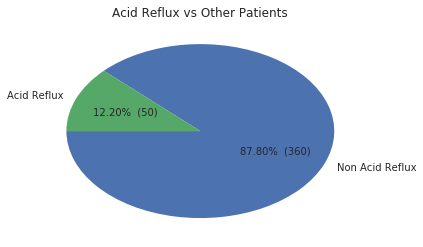

In [51]:
labels = 'Non Acid Reflux','Acid Reflux'
ax = patient_lab_results_features.acid_reflux_patient.value_counts().plot.pie(autopct=make_autopct(patient_lab_results_features.acid_reflux_patient.value_counts()),startangle = 180,title='Acid Reflux vs Other Patients',labels=labels)
ax.set_ylabel('')

#### Let's store the feature anyways

In [52]:
### Fill 0 for which no value available
patient_lab_results_features = patient_lab_results_features.fillna(0)
patient_lab_results_features.head(2)

,PatientGuid,25 OH VITAMIN D: RESULT:,A/G Ratio,ABS BASOPHILS,ABS EOSINOPHILS,ABS LYMPHOCYTES,ABS MONOCYTES,ABS SEGS,ALBUMIN,ALK PHOSPHATASE,...,Vitamin B12,"Vitamin D, 25-Hydroxy","Vitamin D,25 Hydroxy",WBC,WBC COUNT,aPTT,eGFR,eGFR AfricanAmerican,pH,acid_reflux_patient
0,00CEB3ED-0A72-4211-8D7B-46F4C6DEA5AC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,01756EE9-8C28-4EFC-B954-22288FE36177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [53]:
patient_lab_results_features.to_csv("./features/patient_lab_results_features.csv",index=False)

## Let's look at other diagnosis

Patient's other diagnosis may have impact on whether patient will get acid reflux or not

In [54]:
diagnosis = pd.read_csv("./data/Diagnosis.csv")
### Remove the Acid Reflux diagnosis as that can't be input to predict Acid Reflux
diagnosis = diagnosis[diagnosis.ICD9Code != '530.81']

diagnosis.head(5)

,DiagnosisGuid,PatientGuid,ICD9Code,DiagnosisDescription,StartYear,StopYear,Acute,UserGuid
0,AD58C335-C62E-4E4C-A5C9-00005C89DA06,44C0A13A-C841-4063-A2A7-CFADA3785F23,V70.0,Routine general medical examination at a healt...,2010,NaN,0,7511BCEC-9E46-4808-99A7-5B30778B6E84
1,74D1CE08-CD1E-4199-86D3-0001AED0AB24,F2B45907-C559-4077-B2FE-04F354DAB00D,719.45,Pain in joint involving pelvic region and thigh,0,NaN,0,4773B833-9CD4-41E8-895B-846DC1EA7279
2,AFFFEAEF-B454-4FC5-869D-00075A844CEB,1BB806A8-87EE-42B4-960B-5035E84A03C1,780.60,"Fever, unspecified",0,NaN,0,86ACD71A-7F64-43EA-8772-EAD4E1FEF45E
3,11C037C5-0388-4FDB-B777-0007BB0CC51A,CFD993EE-32AD-4A19-821C-71A0438074A6,272.4,Other and unspecified hyperlipidemia,0,NaN,0,2103028E-E805-4F50-A280-407DC423400B
4,F5076968-D5D2-41C9-9C1C-000B8C16CC9D,633FE254-009D-481C-9A3C-8610B2121D0F,465.9,Acute upper respiratory infections of unspecif...,2011,NaN,0,FE52114B-620C-454E-BACA-0B0C7BDF3F32


In [55]:
## Drop columums that's not needed 
diagnosis = diagnosis[["PatientGuid","ICD9Code","DiagnosisDescription"]]

In [56]:
diagnosis.ICD9Code.unique().shape

(3212,)

___Note: -__ There are 3212 ICD9 diagnosis codes. Also, a lot of ICD9 codes points to similar diagnosis. It may be a good idea to use higher level of categorization as Machine Learning features.

CCS provides good level of categorization for ICD9 and ICD 10 codes. We will use CCS categorization to build the feature. More detail on CCS categories at - https://www.hcup-us.ahrq.gov/toolssoftware/ccs/ccsfactsheet.jsp

In [57]:
ccs_icd_mapping = pd.read_csv("./features/ccs_icd_mapping.csv")

## Filter out ICD9 codes

ccs_icd_mapping = ccs_icd_mapping[ccs_icd_mapping.icd_code_type == 9]
ccs_icd_mapping.head(2)

,icd_code,icd_code_type,icd_desc,ccs_desc,ccs_category
72167,01000,9,Prim TB complex-unspec,Tuberculosis,1
72168,01001,9,Prim TB complex-no exam,Tuberculosis,1


In [58]:
### Strip out dots as CCS mapping ICD9 code deosn't have that
diagnosis.ICD9Code = diagnosis.ICD9Code.str.replace(".","",regex=False)

In [59]:
diagnosis.ICD9Code.unique().shape

(3175,)

In [60]:
ICD9Code_not_in_CCS = set(diagnosis.ICD9Code.unique()) - set(ccs_icd_mapping.icd_code.unique())
len(ICD9Code_not_in_CCS)

326

___Since it's around 10% of ICD9 codes, we will drop them. Later on, we can do more investation on these 326 ICD 9 codes. We will build features with ICD9 codes (almost 90%) that are there in CCS.___

In [61]:
IC9Code_in_CCS = set(diagnosis.ICD9Code.unique()) - ICD9Code_not_in_CCS
diagnosis = diagnosis[diagnosis.ICD9Code.isin(IC9Code_in_CCS)]
diagnosis.shape

(43958, 3)

#### Merge CCS description with ICD9 codes

In [62]:
diagnosis = pd.merge(diagnosis,ccs_icd_mapping,how='left',left_on="ICD9Code",right_on="icd_code")

diagnosis.shape

(43958, 8)

In [63]:
diagnosis.head(10)

,PatientGuid,ICD9Code,DiagnosisDescription,icd_code,icd_code_type,icd_desc,ccs_desc,ccs_category
0,44C0A13A-C841-4063-A2A7-CFADA3785F23,V700,Routine general medical examination at a healt...,V700,9,Routine medical exam,Medical examination/evaluation,256
1,F2B45907-C559-4077-B2FE-04F354DAB00D,71945,Pain in joint involving pelvic region and thigh,71945,9,Joint pain-pelvis,Other non-traumatic joint disorders,204
2,1BB806A8-87EE-42B4-960B-5035E84A03C1,78060,"Fever, unspecified",78060,9,Fever NOS,Fever of unknown origin,246
3,CFD993EE-32AD-4A19-821C-71A0438074A6,2724,Other and unspecified hyperlipidemia,2724,9,Hyperlipidemia NEC/NOS,Disorders of lipid metabolism,53
4,633FE254-009D-481C-9A3C-8610B2121D0F,4659,Acute upper respiratory infections of unspecif...,4659,9,Acute uri NOS,Other upper respiratory infections,126
5,7C1EDF94-0F6C-41FB-94EC-7FAE45F4DDEC,78052,"Insomnia, unspecified",78052,9,Insomnia NOS,Residual codes; unclassified,259
6,68CDBD31-4252-4686-ADFC-35766FB77C5E,59389,Other specified disorders of kidney and ureter,59389,9,Renal & ureteral dis NEC,Other diseases of kidney and ureters,161
7,D68E87A6-53CE-468F-B2CB-20E57BE45546,V0481,Need for prophylactic vaccination and inoculat...,V0481,9,Vaccin for influenza,Immunizations and screening for infectious dis...,10
8,205D5DBD-29A3-4EFC-8AA1-47078AFA905C,78843,Nocturia,78843,9,Nocturia,Genitourinary symptoms and ill-defined conditions,163
9,9E087674-9FD8-4C1C-B8F5-06A34BBE7671,7823,Edema,7823,9,Edema,Residual codes; unclassified,259


In [64]:
diagnosis.ccs_desc.describe()

count                             43958
unique                              236
top       Disorders of lipid metabolism
freq                               2363
Name: ccs_desc, dtype: object

___Note: -___ Around 2900 ICD9 codes got mapped to 236 CCS cateogories.

In [65]:
diagnosis = diagnosis[["PatientGuid","ccs_desc"]]
diagnosis.ccs_desc = diagnosis.ccs_desc.str.replace(' ','')

### Drop duplicate diagnosis
diagnosis.drop_duplicates(subset=["PatientGuid","ccs_desc"],keep='first',inplace=True)
diagnosis.shape

(37185, 2)

#### Convert diagnosis into feature

In [66]:
patients_diagnosis_features = pd.pivot_table(diagnosis,index="PatientGuid",columns="ccs_desc",aggfunc=len).reset_index()
patients_diagnosis_features = patients_diagnosis_features.fillna(0)
patients_diagnosis_features.head()

ccs_desc,PatientGuid,Abdominalhernia,Abdominalpain,Acquiredfootdeformities,Acuteandchronictonsillitis,Acuteandunspecifiedrenalfailure,Acutebronchitis,Acutecerebrovasculardisease,Acutemyocardialinfarction,Acuteposthemorrhagicanemia,...,Substance-relateddisorders,Superficialinjury;contusion,Syncope,Systemiclupuserythematosusandconnectivetissuedisorders,Thyroiddisorders,Transientcerebralischemia,Tuberculosis,Urinarytractinfections,Varicoseveinsoflowerextremity,Viralinfection
0,00033D2D-D57C-48A7-B201-F9183F6E640B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00044CC1-7911-4C35-B73C-B5623FA3A60F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,00136822-9A6F-4EF5-ACE7-8B5C836F0635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001EDAC4-4584-4801-8383-4AD784EEA4C9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002E58E8-8314-4000-9BDC-73D21DDD6880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
patients_diagnosis_features.to_csv("./features/patients_diagnosis_features.csv",index=False)

## Let's look at allergy

In [68]:
allergy = pd.read_csv("./data/Allergy.csv")
allergy.shape

(1419, 9)

In [69]:
allergy.MedicationNDCCode = allergy.MedicationNDCCode.fillna(0).astype(int)
allergy.MedicationNDCCode = allergy.MedicationNDCCode.astype(str)
allergy.head(2)

,AllergyGuid,PatientGuid,AllergyType,StartYear,ReactionName,SeverityName,MedicationNDCCode,MedicationName,UserGuid
0,F7998EB6-1A79-4600-8E9D-000B6CB7ED74,2F988EE7-DD22-4729-AD13-F2C7BB78A05B,Medication,2011,Tongue swelling,Severe,247224300,NaN,59C4FFE1-DA98-47BD-8665-9F304765F855
1,DD0F410B-4728-4947-AFE9-0027EE005510,8FE3F534-E716-48CF-9545-C0526021EBDF,Medication,2011,Rash - localized,Mild,54868598600,Trilipix (fenofibric acid) oral delayed releas...,7511BCEC-9E46-4808-99A7-5B30778B6E84


In [70]:
allergy.AllergyType.value_counts()

Medication                                     1288
Pollen (Inhaled)                                 29
Dust (Inhaled)                                   18
Animal Dander (Contact)                          11
Shellfish                                        11
Dairy                                            10
Egg                                               9
Dust Mites  (Contact)                             7
Melons, Bananas, Cucumbers (Ragweed Pollen)       7
Insect Stings  (Contact)                          6
Latex  (Contact)                                  5
Seafood                                           5
Mold (Inhaled)                                    4
Other nuts                                        3
Peanut                                            3
Wheat                                             2
Soy                                               1
Name: AllergyType, dtype: int64

___Looks like most of the allergy data around Medication. When we include medication, it may be a good idea to indicate whether patient has allergy to that medication or not. Let's see if we could do that.___

In [71]:
allergy.MedicationNDCCode.unique().shape

(429,)

In [72]:
allergy.PatientGuid.unique().shape

(832,)

So across 832 patients, there are 429 medicines allergy.

In [73]:
medicines = pd.read_csv("./data/Medication.csv")

In [74]:
len(set(allergy.MedicationNDCCode.unique()) - set(medicines.NdcCode.unique()))

300

Hmmm, but problem is that 300 NDC codes across these 2 datasets don't match. Let's see if we can write a quick script to fix this.

In [75]:
def index_containing_substring(the_list, substring):
    for i, s in enumerate(the_list):
        if substring in s:
              return s
    return -1

In [76]:
not_found_count = 0
for sub in allergy.MedicationNDCCode.unique():
    if index_containing_substring(medicines.NdcCode.unique().tolist(), sub) == -1:
        not_found_count += 1
print ("Number of NDC Codes that don't match: " + str(not_found_count))     

Number of NDC Codes that don't match: 223


___Still there are 223 NDC Codes that don't match. I will drop this feature for now, as this will require more effort to clean up the NDC Code.___